In [2]:
import pandas as pd
import numpy as numpy
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Armado de sets de entrenamiento

In [47]:
train = pd.DataFrame()

In [48]:
for ventana in range(1,4):
    
    features_pageviews = pd.read_pickle("../data/features/ventana_{}_pageviews.pkl".format(ventana))
    features_conversion = pd.read_pickle("../data/features/ventana_{}_conversion.pkl".format(ventana))
    features_devicedata = pd.read_pickle("../data/features/ventana_{}_devicedata.pkl".format(ventana))
    
    label = pd.read_pickle("../data/labels/labels_trimestre_{}.pkl".format(ventana+1))

    
#    print("VUELTA {}---------------------".format(ventana))
#    print(features_pageviews.columns)
#    print(features_conversion.columns)
#    print(features_devicedata.columns)
#    print(label.columns)
        
    train_actual = label.merge(features_pageviews,left_index = True, right_index = True, how = 'left')
    train_actual = train_actual.merge(features_conversion,left_index = True, right_index = True, how = 'left')
    train_actual = train_actual.merge(features_devicedata,left_index = True, right_index = True, how = 'left')
    
    train = train.append(train_actual)

In [50]:
train.head()

,convirtio,cantidad_paginas_vistas_trimestre,cant_paginas_vistas_en_mes_1,cant_paginas_vistas_en_mes_2,cant_paginas_vistas_en_mes_3,page_top_en_mes_1,page_top_en_mes_2,page_top_en_mes_3,vistas_page_top_en_mes_1,vistas_page_top_en_mes_2,...,busquedas_termino_top_mes_3,convirtio_en_mes_1,convirtio_en_mes_2,convirtio_en_mes_3,convirtio_multiple_en_mes_1,convirtio_multiple_en_mes_2,convirtio_multiple_en_mes_3,convirtio_en_trimestre_actual,cant_vistas_no_md_trimestre,cant_vistas_md_trimestre
USER_ID,,,,,,,,,,,,,,,,,,,,,
6574,False,1141.0,524.0,364.0,253.0,10.0,10.0,10.0,100.0,64.0,...,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,74.0
2639,True,671.0,261.0,179.0,231.0,3.0,5.0,3.0,53.0,29.0,...,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,48.0
3898,False,219.0,88.0,50.0,81.0,85.0,85.0,27.0,30.0,15.0,...,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,14.0
7996,False,383.0,95.0,178.0,110.0,2.0,2.0,2.0,26.0,31.0,...,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,24.0
6111,False,425.0,208.0,93.0,124.0,3.0,39.0,3.0,27.0,10.0,...,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,32.0


In [52]:
train['convirtio_en_mes_1'].isnull().sum()

34016

### Formateo los datos

In [53]:
train.columns

Index(['convirtio', 'cantidad_paginas_vistas_trimestre',
       'cant_paginas_vistas_en_mes_1', 'cant_paginas_vistas_en_mes_2',
       'cant_paginas_vistas_en_mes_3', 'page_top_en_mes_1',
       'page_top_en_mes_2', 'page_top_en_mes_3', 'vistas_page_top_en_mes_1',
       'vistas_page_top_en_mes_2', 'vistas_page_top_en_mes_3',
       'sitio_mas_visitado_en_mes_1', 'sitio_mas_visitado_en_mes_2',
       'sitio_mas_visitado_en_mes_3', 'vistas_site_top_mes_1',
       'vistas_site_top_mes_2', 'vistas_site_top_mes_3',
       'termino_top_en_mes_1', 'termino_top_en_mes_2', 'termino_top_en_mes_3',
       'busquedas_termino_top_mes_1', 'busquedas_termino_top_mes_2',
       'busquedas_termino_top_mes_3', 'convirtio_en_mes_1',
       'convirtio_en_mes_2', 'convirtio_en_mes_3',
       'convirtio_multiple_en_mes_1', 'convirtio_multiple_en_mes_2',
       'convirtio_multiple_en_mes_3', 'convirtio_en_trimestre_actual',
       'cant_vistas_no_md_trimestre', 'cant_vistas_md_trimestre'],
      dtype='obje

#### Columnas categoricas

In [54]:
columnas_categoricas = [   'page_top_en_mes_1', 'page_top_en_mes_2','page_top_en_mes_3',
                        'termino_top_en_mes_1', 'termino_top_en_mes_2', 'termino_top_en_mes_3',
                       'sitio_mas_visitado_en_mes_1','sitio_mas_visitado_en_mes_2', 'sitio_mas_visitado_en_mes_3',]

In [55]:
train[columnas_categoricas] = train[columnas_categoricas].fillna(-1)
train[columnas_categoricas] = train[columnas_categoricas].astype("int16")

#### Columnas con valores numericos

In [56]:
columnas_contar = ['cantidad_paginas_vistas_trimestre','cant_paginas_vistas_en_mes_1', 'cant_paginas_vistas_en_mes_2',
                   'cant_paginas_vistas_en_mes_3','busquedas_termino_top_mes_1', 'busquedas_termino_top_mes_2',
                   'busquedas_termino_top_mes_3','vistas_page_top_en_mes_1', 'vistas_page_top_en_mes_2', 'vistas_page_top_en_mes_3',
                   'vistas_site_top_mes_1', 'vistas_site_top_mes_2', 'vistas_site_top_mes_3','cant_vistas_no_md_trimestre',
                    'cant_vistas_md_trimestre' ]

In [57]:
train[columnas_contar] = train[columnas_contar].fillna(0)
train[columnas_contar] = train[columnas_contar].astype("int64")

#### Columnas booleanas

In [58]:
columnas_booleanas = ['convirtio_en_mes_1', 'convirtio_en_mes_2', 'convirtio_en_mes_3',
       'convirtio_multiple_en_mes_1', 'convirtio_multiple_en_mes_2',
       'convirtio_multiple_en_mes_3',"convirtio_en_trimestre_actual"]

In [59]:
train["convirtio"] = train["convirtio"] * 1

In [60]:
train[columnas_booleanas] = train[columnas_booleanas].fillna(0)
train[columnas_booleanas] = train[columnas_booleanas].astype("int8")

---

In [61]:
train.head(15)

,convirtio,cantidad_paginas_vistas_trimestre,cant_paginas_vistas_en_mes_1,cant_paginas_vistas_en_mes_2,cant_paginas_vistas_en_mes_3,page_top_en_mes_1,page_top_en_mes_2,page_top_en_mes_3,vistas_page_top_en_mes_1,vistas_page_top_en_mes_2,...,busquedas_termino_top_mes_3,convirtio_en_mes_1,convirtio_en_mes_2,convirtio_en_mes_3,convirtio_multiple_en_mes_1,convirtio_multiple_en_mes_2,convirtio_multiple_en_mes_3,convirtio_en_trimestre_actual,cant_vistas_no_md_trimestre,cant_vistas_md_trimestre
USER_ID,,,,,,,,,,,,,,,,,,,,,
6574,0,1141,524,364,253,10,10,10,100,64,...,253,0,0,0,0,0,0,0,23,74
2639,1,671,261,179,231,3,5,3,53,29,...,231,0,0,0,0,0,0,0,38,48
3898,0,219,88,50,81,85,85,27,30,15,...,81,0,0,0,0,0,0,0,17,14
7996,0,383,95,178,110,2,2,2,26,31,...,110,0,0,0,0,0,0,0,23,24
6111,0,425,208,93,124,3,39,3,27,10,...,124,0,0,0,0,0,0,0,3,32
2378,0,879,361,330,188,3,3,3,63,57,...,188,0,1,0,0,1,0,1,0,117
3868,0,267,38,72,157,10,2,3,6,8,...,157,0,0,0,0,0,0,0,14,12
3861,0,344,82,105,157,14,2,5,36,17,...,157,0,0,0,0,0,0,0,0,59
2587,0,406,153,109,144,27,3,27,36,26,...,144,0,0,0,0,0,0,0,80,1


In [63]:
train.to_pickle("../data/train_completo.pkl")

### Armado de set prediccion

In [17]:
    
features_pageviews = pd.read_pickle("../data/features/predecir_pageviews.pkl")
features_conversion = pd.read_pickle("../data/features/predecir_conversion.pkl")
features_devicedata = pd.read_pickle("../data/features/predecir_devicedata.pkl")
    
features_pred = features_pageviews.merge(features_conversion,left_index = True, right_index = True, how = 'left')
features_pred = features_pred.merge(features_devicedata,left_index = True, right_index = True, how = 'left')

In [18]:
features_pred.head()

,cantidad_paginas_vistas_trimestre,cant_paginas_vistas_en_mes_1,cant_paginas_vistas_en_mes_2,cant_paginas_vistas_en_mes_3,page_top_en_mes_1,page_top_en_mes_2,page_top_en_mes_3,vistas_page_top_en_mes_1,vistas_page_top_en_mes_2,vistas_page_top_en_mes_3,...,busquedas_termino_top_mes_3,convirtio_en_mes_1,convirtio_en_mes_2,convirtio_en_mes_3,convirtio_multiple_en_mes_1,convirtio_multiple_en_mes_2,convirtio_multiple_en_mes_3,convirtio_en_trimestre_actual,cant_vistas_no_md_trimestre,cant_vistas_md_trimestre
USER_ID,,,,,,,,,,,,,,,,,,,,,
0,1519,527,490,502,2,2,2,109,88,92,...,502,0,0,0,0,0,0,0,0,112
1,477,138,140,199,2,2,2,30,31,57,...,199,0,0,0,0,0,0,0,9,50
2,651,222,142,287,2,2,21,44,17,45,...,287,0,0,0,0,0,0,0,19,55
3,381,63,121,197,2,2,2,13,21,47,...,197,0,0,0,0,0,0,0,5,52
4,627,284,278,65,27,2,2,52,59,11,...,65,0,0,0,0,0,0,0,46,2


In [19]:
features_pred.to_pickle("../data/prediccion_completo.pkl")

---

## Binary encode

In [3]:
train = pd.read_pickle("../data/train_completo.pkl")

In [4]:
label = train["convirtio"]
train.drop("convirtio",axis = 1, inplace = True )

In [5]:
columnas_categoricas = [   'page_top_en_mes_1', 'page_top_en_mes_2','page_top_en_mes_3',
                        'termino_top_en_mes_1', 'termino_top_en_mes_2', 'termino_top_en_mes_3',
                       'sitio_mas_visitado_en_mes_1','sitio_mas_visitado_en_mes_2', 'sitio_mas_visitado_en_mes_3',]

In [6]:
encoder = ce.BinaryEncoder(cols=columnas_categoricas)
train_binary = encoder.fit_transform(train)



In [7]:

train_binary.columns

Index(['cantidad_paginas_vistas_trimestre', 'cant_paginas_vistas_en_mes_1',
       'cant_paginas_vistas_en_mes_2', 'cant_paginas_vistas_en_mes_3',
       'page_top_en_mes_1_0', 'page_top_en_mes_1_1', 'page_top_en_mes_1_2',
       'page_top_en_mes_1_3', 'page_top_en_mes_1_4', 'page_top_en_mes_1_5',
       'page_top_en_mes_1_6', 'page_top_en_mes_1_7', 'page_top_en_mes_1_8',
       'page_top_en_mes_2_0', 'page_top_en_mes_2_1', 'page_top_en_mes_2_2',
       'page_top_en_mes_2_3', 'page_top_en_mes_2_4', 'page_top_en_mes_2_5',
       'page_top_en_mes_2_6', 'page_top_en_mes_2_7', 'page_top_en_mes_2_8',
       'page_top_en_mes_3_0', 'page_top_en_mes_3_1', 'page_top_en_mes_3_2',
       'page_top_en_mes_3_3', 'page_top_en_mes_3_4', 'page_top_en_mes_3_5',
       'page_top_en_mes_3_6', 'page_top_en_mes_3_7', 'page_top_en_mes_3_8',
       'vistas_page_top_en_mes_1', 'vistas_page_top_en_mes_2',
       'vistas_page_top_en_mes_3', 'sitio_mas_visitado_en_mes_1_0',
       'sitio_mas_visitado_en_mes_1_1'

In [8]:
train_binary["convirtio"] = label

In [9]:
train_binary.head()

,cantidad_paginas_vistas_trimestre,cant_paginas_vistas_en_mes_1,cant_paginas_vistas_en_mes_2,cant_paginas_vistas_en_mes_3,page_top_en_mes_1_0,page_top_en_mes_1_1,page_top_en_mes_1_2,page_top_en_mes_1_3,page_top_en_mes_1_4,page_top_en_mes_1_5,...,convirtio_en_mes_1,convirtio_en_mes_2,convirtio_en_mes_3,convirtio_multiple_en_mes_1,convirtio_multiple_en_mes_2,convirtio_multiple_en_mes_3,convirtio_en_trimestre_actual,cant_vistas_no_md_trimestre,cant_vistas_md_trimestre,convirtio
USER_ID,,,,,,,,,,,,,,,,,,,,,
6574,1141,524,364,253,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23,74,0
2639,671,261,179,231,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38,48,1
3898,219,88,50,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,14,0
7996,383,95,178,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23,24,0
6111,425,208,93,124,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,32,0


In [10]:
train_binary.to_pickle("../data/train_codificado.pkl")

In [11]:
pred = pd.read_pickle("../data/prediccion_completo.pkl")

In [12]:
pred_binary = encoder.transform(pred)



In [13]:
pred_binary.to_pickle("../data/prediccion_codificado.pkl")

# Busco correlacion entre los datos

In [14]:
train = pd.read_pickle("../data/train_completo.pkl")

In [15]:
pred = pd.read_pickle("../data/prediccion_completo.pkl")

In [16]:
train.isna().sum()

convirtio                            0
cantidad_paginas_vistas_trimestre    0
cant_paginas_vistas_en_mes_1         0
cant_paginas_vistas_en_mes_2         0
cant_paginas_vistas_en_mes_3         0
page_top_en_mes_1                    0
page_top_en_mes_2                    0
page_top_en_mes_3                    0
vistas_page_top_en_mes_1             0
vistas_page_top_en_mes_2             0
vistas_page_top_en_mes_3             0
sitio_mas_visitado_en_mes_1          0
sitio_mas_visitado_en_mes_2          0
sitio_mas_visitado_en_mes_3          0
vistas_site_top_mes_1                0
vistas_site_top_mes_2                0
vistas_site_top_mes_3                0
termino_top_en_mes_1                 0
termino_top_en_mes_2                 0
termino_top_en_mes_3                 0
busquedas_termino_top_mes_1          0
busquedas_termino_top_mes_2          0
busquedas_termino_top_mes_3          0
convirtio_en_mes_1                   0
convirtio_en_mes_2                   0
convirtio_en_mes_3       

In [3]:
#IMPOSIBLE DE HACER, MUCHAS COLUMNAS
#sns.pairplot(train, hue = 'convirtio')

In [16]:
corr = train.corr()

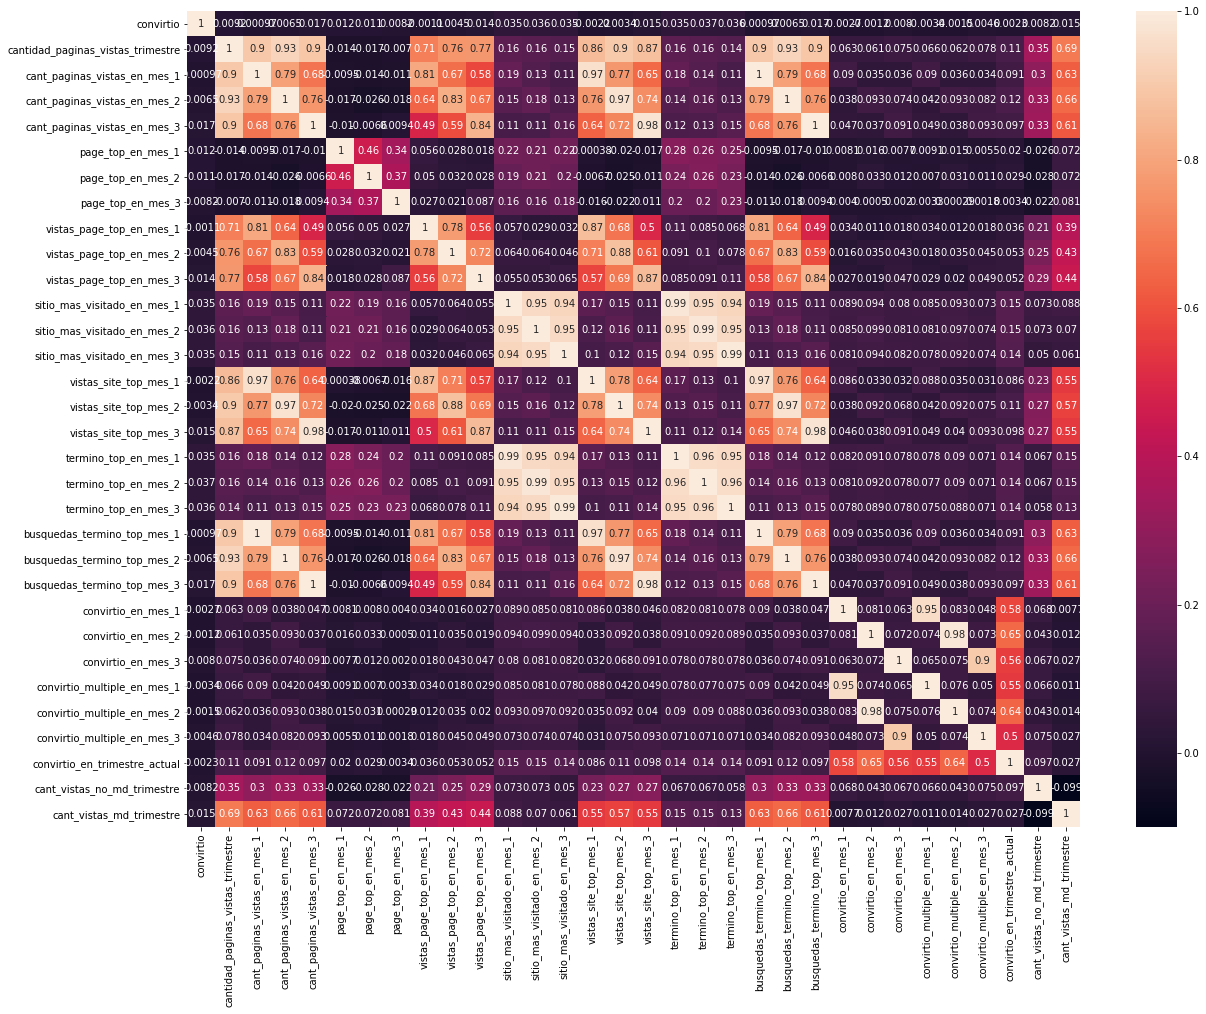

In [18]:
fig, ax = plt.subplots(figsize= (20,15))
sns.heatmap(corr, annot=True,  ax = ax)

#### Columnas correlacionadas:

####    __cantidad_paginas_trimestre__ : cantidad_ṕaginas_vistas mes 1,2 y 3 . Hay que eliminar esta columna

####    __vistas_page_top_en_mes_1,2,3 / vistas_site_top_en_mes 1,2,3 / busquedas_termino_top_mes 1,2,3__ : Correlacionadas con cantidad_paginas_vistas mes 1,2,3

####    __sitio_mas_visitado_mes 2 y 3__ : sitio_mas_visitado_mes_1 (Se puede hacer un nuevo feature que englobe al sitio mas visitado en el trimestre solamente)

####    __sitio_mas_visitado_mes 1,2,3__ : con termino_mas_buscado_mes 1,2,3 (Esto es raro, quizas me equivoque al calcular elfeature y calcule dos veces lo mismo en vez de                  calcular el termino calcule el sitio)



In [17]:
train.columns

Index(['convirtio', 'cantidad_paginas_vistas_trimestre',
       'cant_paginas_vistas_en_mes_1', 'cant_paginas_vistas_en_mes_2',
       'cant_paginas_vistas_en_mes_3', 'page_top_en_mes_1',
       'page_top_en_mes_2', 'page_top_en_mes_3', 'vistas_page_top_en_mes_1',
       'vistas_page_top_en_mes_2', 'vistas_page_top_en_mes_3',
       'sitio_mas_visitado_en_mes_1', 'sitio_mas_visitado_en_mes_2',
       'sitio_mas_visitado_en_mes_3', 'vistas_site_top_mes_1',
       'vistas_site_top_mes_2', 'vistas_site_top_mes_3',
       'termino_top_en_mes_1', 'termino_top_en_mes_2', 'termino_top_en_mes_3',
       'busquedas_termino_top_mes_1', 'busquedas_termino_top_mes_2',
       'busquedas_termino_top_mes_3', 'convirtio_en_mes_1',
       'convirtio_en_mes_2', 'convirtio_en_mes_3',
       'convirtio_multiple_en_mes_1', 'convirtio_multiple_en_mes_2',
       'convirtio_multiple_en_mes_3', 'convirtio_en_trimestre_actual',
       'cant_vistas_no_md_trimestre', 'cant_vistas_md_trimestre'],
      dtype='obje

In [18]:
columnas_redundantes = ['cantidad_paginas_vistas_trimestre','vistas_site_top_mes_1',
       'vistas_site_top_mes_2', 'vistas_site_top_mes_3','vistas_page_top_en_mes_1',
       'vistas_page_top_en_mes_2', 'vistas_page_top_en_mes_3', 'busquedas_termino_top_mes_1', 'busquedas_termino_top_mes_2',
       'busquedas_termino_top_mes_3','convirtio_en_trimestre_actual']

In [19]:
train.drop(columnas_redundantes, axis = 1, inplace = True)

In [20]:
pred.drop(columnas_redundantes, axis =1, inplace = True)

In [21]:
train.columns

Index(['convirtio', 'cant_paginas_vistas_en_mes_1',
       'cant_paginas_vistas_en_mes_2', 'cant_paginas_vistas_en_mes_3',
       'page_top_en_mes_1', 'page_top_en_mes_2', 'page_top_en_mes_3',
       'sitio_mas_visitado_en_mes_1', 'sitio_mas_visitado_en_mes_2',
       'sitio_mas_visitado_en_mes_3', 'termino_top_en_mes_1',
       'termino_top_en_mes_2', 'termino_top_en_mes_3', 'convirtio_en_mes_1',
       'convirtio_en_mes_2', 'convirtio_en_mes_3',
       'convirtio_multiple_en_mes_1', 'convirtio_multiple_en_mes_2',
       'convirtio_multiple_en_mes_3', 'cant_vistas_no_md_trimestre',
       'cant_vistas_md_trimestre'],
      dtype='object')

In [22]:
train.to_pickle("../data/train_reducido.pkl")

In [23]:
pred.to_pickle("../data/prediccion_reducido.pkl")

#### Binary encoding de los reducidos

In [24]:
label = train["convirtio"]
train.drop("convirtio",axis = 1, inplace = True )

In [25]:
columnas_categoricas = [   'page_top_en_mes_1', 'page_top_en_mes_2','page_top_en_mes_3',
                        'termino_top_en_mes_1', 'termino_top_en_mes_2', 'termino_top_en_mes_3',
                       'sitio_mas_visitado_en_mes_1','sitio_mas_visitado_en_mes_2', 'sitio_mas_visitado_en_mes_3',]

In [26]:
encoder = ce.BinaryEncoder(cols=columnas_categoricas)
train_binary = encoder.fit_transform(train)



In [27]:

train_binary.columns

Index(['cant_paginas_vistas_en_mes_1', 'cant_paginas_vistas_en_mes_2',
       'cant_paginas_vistas_en_mes_3', 'page_top_en_mes_1_0',
       'page_top_en_mes_1_1', 'page_top_en_mes_1_2', 'page_top_en_mes_1_3',
       'page_top_en_mes_1_4', 'page_top_en_mes_1_5', 'page_top_en_mes_1_6',
       'page_top_en_mes_1_7', 'page_top_en_mes_1_8', 'page_top_en_mes_2_0',
       'page_top_en_mes_2_1', 'page_top_en_mes_2_2', 'page_top_en_mes_2_3',
       'page_top_en_mes_2_4', 'page_top_en_mes_2_5', 'page_top_en_mes_2_6',
       'page_top_en_mes_2_7', 'page_top_en_mes_2_8', 'page_top_en_mes_3_0',
       'page_top_en_mes_3_1', 'page_top_en_mes_3_2', 'page_top_en_mes_3_3',
       'page_top_en_mes_3_4', 'page_top_en_mes_3_5', 'page_top_en_mes_3_6',
       'page_top_en_mes_3_7', 'page_top_en_mes_3_8',
       'sitio_mas_visitado_en_mes_1_0', 'sitio_mas_visitado_en_mes_1_1',
       'sitio_mas_visitado_en_mes_1_2', 'sitio_mas_visitado_en_mes_1_3',
       'sitio_mas_visitado_en_mes_2_0', 'sitio_mas_visitado_

In [28]:
train_binary["convirtio"] = label

In [30]:
train_binary.to_pickle("../data/train_reducido_codificado.pkl")

In [31]:
pred_binary = encoder.transform(pred)



In [32]:
pred_binary.to_pickle("../data/prediccion_reducido_codificado.pkl")